<a href="https://colab.research.google.com/github/tallywiesenberg/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Wiesenberg_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

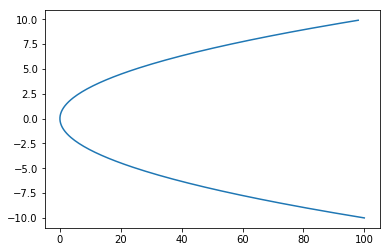

In [81]:
##DOESNT PASS

#generate y_values
y = np.arange(-10, 10, 0.1)
x = y**2
plt.plot(x, y)

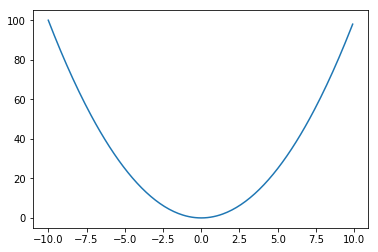

In [82]:
##PASSES

#generate x_values
x = np.arange(-10, 10, 0.1)
y = x**2
plt.plot(x, y)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

They are not considered functions because more than one output matches each input.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relations 2 is the only function, because it is the only function where each output has only one input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

m: domain dimensions = 3, codomain dimensions = 3
n: domain dimensions = 4, codomain dimensions = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

I think they can. For example, the function below (albeit its input is a list of numbers) outputs 3 values from the one list.

In [0]:
def mean_std_variance(numlist):
  #calculate mean, standard dev,  and variance for list of numbers
  mean = sum(numlist) / len(numlist)
  distance_squared = [(n - mean)**2 for n in numlist]
  variance = sum(distance_squared) / (len(numlist)-1)
  std = sqrt(variance)
  return mean, std, variance

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [84]:
#create unit vectors in 2d and 3d space
unit_2d = np.array([1, 1])
unit_3d = np.array([1, 1, 1])
#define and apply p function
def p(array_2d):
  transpose = np.array([[1, 3 ],
                        [2, -1]])
  trans_matrix = np.matmul(transpose, array_2d)
  return trans_matrix
trans_matrix = p(unit_2d)
print(trans_matrix)

[4 1]


In [85]:
#define and apply 1 function
def q(array_3d):
  transpose = np.array([[4, 1, 2 ],
                        [2, -1, 3],
                        [5, -2, 1]])
  trans_matrix = np.matmul(transpose, array_3d)
  return trans_matrix
trans_matrix = q(unit_3d)
print(trans_matrix)

[7 4 4]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [86]:
#inputs
input_2d = np.array([2, 7])
transpose_2d = np.array([[1, 3 ],
                         [2, -1]])
input_3d = np.array([2, 3, 9])
transpose_3d = np.array([[4, 1, 2 ],
                         [2, -1, 3],
                         [5, -2, 1]])
#traditional functions
p_result = np.array([])
x1 = np.dot(transpose_2d[0], input_2d)
x2 = np.dot(transpose_2d[1], input_2d)
values = [x1, x2]
p_result = np.append(p_result, values)
print(p_result)

q_result = np.array([])
x1 = np.dot(transpose_3d[0], input_3d)
x2 = np.dot(transpose_3d[1], input_3d)
x3 = np.dot(transpose_3d[2], input_3d)
values = [x1, x2, x3]
q_result = np.append(q_result, values)
print(q_result)
#vector_matrix mult
trans_matrix = p(input_2d)
print(trans_matrix)
print(p_result == trans_matrix)
trans_matrix = q(input_3d)
print(trans_matrix)
print(q_result == trans_matrix)

[23. -3.]
[29. 28. 13.]
[23 -3]
[ True  True]
[29 28 13]
[ True  True  True]


In [87]:
transpose_2d[0]

array([1, 3])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors, multiplied by the right matrix, will only change in magnitude, not both magnitude and direction. The change in magnitude is the eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

High dimensional spaces are hard to visualize, take longer to process, and lead to overfitting.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

There should be at least 5 oberservations per feature.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [88]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
#separate features and target variables, convert pandas series to numpy array
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
target = df['species'].to_numpy()
print('Features Head: \n', features[:5])
#calculate means
means = np.mean(features.T, axis=1)
print('Feature Means: \n', means)
#subtract feature means to center at 0
centered_data = features - means
print('Centered Data Head: \n', centered_data[:5])
#create covariance table from centered features
covariance_matrix = np.cov(centered_data.T)
print('Covariance Matrix \n', covariance_matrix )
#eigen decomposition of covariance matrix
values, vectors = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n', vectors)
print('Eigenvalues \n', values)
#project data
projected_data = vectors.T.dot(centered_data.T)
print('Projected Data Head \n', projected_data.T[:5])

Features Head: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Feature Means: 
 [5.84333333 3.054      3.75866667 1.19866667]
Centered Data Head: 
 [[-0.74333333  0.446      -2.35866667 -0.99866667]
 [-0.94333333 -0.054      -2.35866667 -0.99866667]
 [-1.14333333  0.146      -2.45866667 -0.99866667]
 [-1.24333333  0.046      -2.25866667 -0.99866667]
 [-0.84333333  0.546      -2.35866667 -0.99866667]]
Covariance Matrix 
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
Eigenvectors 
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
Eigenvalues 
 [4.22484077 0.24224357 0.07852391 0.02368303]
Projected Data Head 
 [[-2.68420713e+00 -

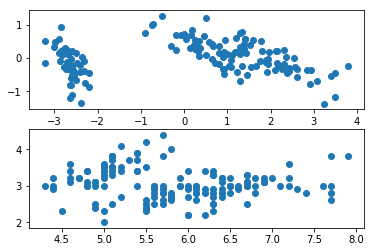

In [98]:
fig, axes = plt.subplots(2, 1)
#plot PC 1 and 2
axes[0].scatter(projected_data[0], projected_data[1])
#plot features 1 and 2
axes[1].scatter(features.T[0], features.T[1])

In [0]:
projected_data

In [0]:
np.std(centered_data.T, axis=1)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)